In [36]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# 构建模型

class SimpleModel(torch.nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x



In [47]:
filename = "../data/diabetes.csv"
loadtxt = np.loadtxt(filename, delimiter=",", dtype=np.float32)

oneline = loadtxt[0, :]
n_item = loadtxt.shape[0]
print(oneline.shape)

(9,)


In [29]:
data = loadtxt[:, 0:-1]
print(data.shape)
data = torch.tensor(data, requires_grad=True)
labels = loadtxt[:, -1]
labels = torch.tensor(labels, requires_grad=True).view(n_item, 1)

(768, 8)


In [43]:
model = SimpleModel()
bce_loss = torch.nn.BCELoss(size_average=True)
sgd = torch.optim.SGD(model.parameters(), lr=0.01)
epoch = 1000
loss_history = []
for i in range(epoch):
    prediction = model.forward(data)
    loss = bce_loss(prediction, labels)
    loss_history.append(loss.item())
    sgd.zero_grad()
    loss.backward()
    sgd.step()

/Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Parameter containing:
tensor([[ 0.1500, -0.0632,  0.1014,  0.0290, -0.3170,  0.1091, -0.0027, -0.2973],
        [ 0.0723, -0.2046,  0.1399, -0.0124, -0.2022, -0.0602,  0.3326, -0.3304],
        [-0.1459,  0.3022, -0.1596, -0.1916,  0.0815, -0.0546,  0.1753,  0.2236],
        [-0.2135, -0.3491,  0.0299, -0.0285, -0.2962,  0.3508,  0.2133, -0.1651],
        [-0.1729, -0.1111,  0.1898,  0.3510, -0.3208,  0.3152, -0.3225, -0.2181],
        [-0.3200, -0.2328, -0.2876, -0.1766,  0.1910,  0.1553,  0.1089, -0.0048]],
       requires_grad=True)
Parameter containing:
tensor([-0.2849,  0.3379,  0.3220, -0.3423, -0.2008,  0.2353],
       requires_grad=True)
Parameter containing:
tensor([[-0.3823, -0.2464, -0.2041, -0.0024, -0.0146,  0.4058],
        [-0.2487,  0.2933,  0.3558, -0.2035, -0.2280,  0.2970],
        [ 0.3403, -0.1067, -0.3528,  0.3600,  0.0938,  0.2990],
        [ 0.0105, -0.1019, -0.0889,  0.2491, -0.1986,  0.3993]],
       requires_grad=True)
Parameter containing:
tensor([ 0.2020,  

In [44]:
train_cnt = np.linspace(1, epoch, epoch)
print(loss_history)

[0.8656423091888428, 0.8634384274482727, 0.8612554669380188, 0.8590934872627258, 0.856952428817749, 0.8548317551612854, 0.8527315258979797, 0.8506516814231873, 0.8485917448997498, 0.8465516567230225, 0.8445315361022949, 0.8425307273864746, 0.8405494689941406, 0.8385874629020691, 0.8366444706916809, 0.8347203731536865, 0.8328151702880859, 0.8309283256530762, 0.8290600776672363, 0.8272101283073425, 0.8253781199455261, 0.8235641121864319, 0.821768045425415, 0.8199895024299622, 0.8182284235954285, 0.8164848685264587, 0.8147582411766052, 0.813048779964447, 0.8113560676574707, 0.8096804022789001, 0.808021068572998, 0.806378185749054, 0.8047516942024231, 0.8031412959098816, 0.8015468716621399, 0.799968421459198, 0.7984054684638977, 0.7968582510948181, 0.7953264713287354, 0.7938098907470703, 0.7923085689544678, 0.7908222079277039, 0.7893507480621338, 0.7878939509391785, 0.7864518165588379, 0.7850241661071777, 0.7836108207702637, 0.7822117209434509, 0.7808266282081604, 0.7794556021690369, 0.778

Text(0, 0.5, 'loss')

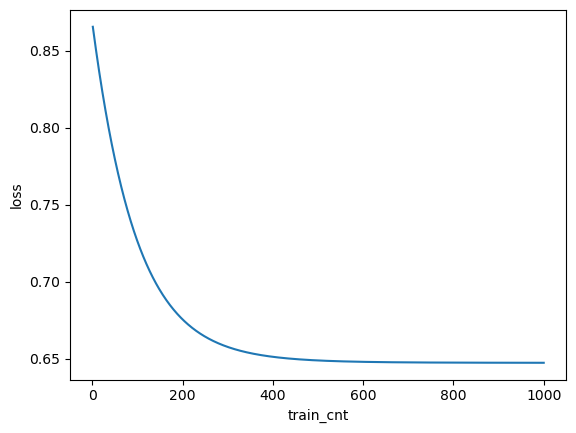

In [46]:
plt.plot(train_cnt, loss_history)
plt.xlabel("train_cnt")
plt.ylabel("loss")